In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import xlsxwriter
import pandas as pd
import os,sys
import seaborn as sns

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
cwd = os.getcwd()

In [4]:
df = pd.read_csv(cwd+'/IrCNNN_smiles_dative.csv')
df.drop(columns=['max_lambda','CN_smiles','NN_smiles','complex_smiles'], axis=1, inplace=True)
df

,complex_i,C^N,N^N,Emax
0,0,1,1,48.74
1,1,2,1,48.20
2,2,3,1,50.86
3,3,4,1,51.23
4,4,5,1,51.13
...,...,...,...,...
1435,1435,105,47,56.65
1436,1436,106,47,54.70
1437,1437,107,47,51.78
1438,1438,108,47,50.86


In [5]:
df_cn = pd.read_csv(cwd+'/CN_smiles.csv')
df_cn.drop(columns=['CN_smiles','HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_cn

,C^N,CN_smiles_clean,CN_HOMO,CN_LUMO
0,1,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02
1,2,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45
2,3,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54
3,4,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64
4,5,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00
5,7,CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2,-155.15,-51.41
6,9,CC(C=C1)=CN=C1C2=CC=C(OC)C=C2,-137.94,-32.17
7,11,CC(C=C1)=CN=C1C2=CC=C(F)C=C2F,-150.80,-37.62
8,12,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Cl,-153.90,-35.19
9,13,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Br,-153.68,-35.02


In [6]:
df_nn = pd.read_csv(cwd+'/NN_smiles.csv')
df_nn.drop(columns=['NN_smiles','HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_nn

,N^N,NN_smiles_clean,NN_HOMO,NN_LUMO
0,1,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
1,2,CC1=CC(C2=NC=CC(C)=C2)=NC=C1,-153.90,-41.21
2,3,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76
3,4,CC1=CC=CC(C2=NC(C)=CC=C2)=N1,-150.25,-41.26
4,5,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...,-155.88,-46.17
5,6,CC(C)(C)C1=CC(C2=NC=CC(C(C)(C)C)=C2)=NC=C1,-152.69,-40.61
6,7,FC(C1=CN=C(C2=NC=C(C(F)(F)F)C=C2)C=C1)(F)F,-169.38,-59.00
7,8,COC1=CC(C2=NC=CC(OC)=C2)=NC=C1,-159.88,-35.25
8,14,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88
9,16,C12=NC=CC=C1C=CC3=CC=CN=C23,-153.03,-44.09


In [7]:
df_st = pd.read_csv(cwd+'/st_eng_IrCNNN.csv')
df_st.drop(columns=['singlet','triplet','dE(Hartree)'],axis=1,inplace=True)
df_st

,complex_i,dE
0,1,49.545466
1,2,52.956909
2,3,52.718456
3,4,53.092320
4,5,54.745199
...,...,...
120,140,57.457145
121,141,58.022048
122,142,52.960417
123,143,60.586384


In [8]:
df_hl = pd.read_csv(cwd+'/homo_lumo_IrCNNN.csv')
df_hl.drop(columns=['HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_hl

,complex_i,HOMO,LUMO,HL_gap
0,1,-136.06,-62.58,73.49
1,2,-136.11,-62.70,73.41
2,3,-139.87,-63.78,76.09
3,4,-142.56,-63.65,78.91
4,5,-146.64,-64.65,81.99
...,...,...,...,...
139,143,-144.03,-61.85,82.18
140,144,-140.72,-61.48,79.24
141,145,-144.01,-62.05,81.96
142,146,-127.74,-59.02,68.72


In [13]:
df_sub = pd.merge(df_st, df_hl, how="inner", on="complex_i")
df_sum = pd.merge(result, df_sub, how="inner", on="complex_i")
df_sum

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,dE,HOMO,LUMO,HL_gap
0,1,2,1,48.20,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,113.19,119.25,108.25,49.545466,-136.06,-62.58,73.49
1,2,3,1,50.86,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,112.55,119.25,107.70,52.956909,-136.11,-62.70,73.41
2,3,4,1,51.23,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,110.07,119.25,108.32,52.718456,-139.87,-63.78,76.09
3,4,5,1,51.13,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,109.30,119.25,107.91,53.092320,-142.56,-63.65,78.91
4,5,7,1,50.64,CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2,-155.15,-51.41,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,103.74,119.25,114.76,54.745199,-146.64,-64.65,81.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,140,38,3,53.93,ClC1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1,-148.35,-50.35,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76,98.00,108.80,108.59,57.457145,-142.04,-62.47,79.56
121,141,39,3,52.40,ClC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1,-148.56,-48.13,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76,100.43,108.80,108.80,58.022048,-142.76,-62.38,80.38
122,142,40,3,53.03,FC(C1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1)(F)F,-152.59,-54.80,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76,97.79,108.80,112.83,52.960417,-146.50,-62.98,83.52
123,143,41,3,54.97,FC(C1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1)(F)F,-152.52,-53.20,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76,99.32,108.80,112.76,60.586384,-144.03,-61.85,82.18


In [16]:
df_sum['DFT_error'] = df_sum['dE'] - df_sum['Emax']

In [30]:
df_test = df_sum[['complex_i','CN_gap','NN_gap','LL_gap','HL_gap','Emax','dE','DFT_error']]
df_test

,complex_i,CN_gap,NN_gap,LL_gap,HL_gap,Emax,dE,DFT_error
0,1,113.19,119.25,108.25,73.49,48.20,49.545466,1.345466
1,2,112.55,119.25,107.70,73.41,50.86,52.956909,2.096909
2,3,110.07,119.25,108.32,76.09,51.23,52.718456,1.488456
3,4,109.30,119.25,107.91,78.91,51.13,53.092320,1.962320
4,5,103.74,119.25,114.76,81.99,50.64,54.745199,4.105199
...,...,...,...,...,...,...,...,...
120,140,98.00,108.80,108.59,79.56,53.93,57.457145,3.527145
121,141,100.43,108.80,108.80,80.38,52.40,58.022048,5.622048
122,142,97.79,108.80,112.83,83.52,53.03,52.960417,-0.069583
123,143,99.32,108.80,112.76,82.18,54.97,60.586384,5.616384


In [34]:
df_test.describe()

,complex_i,CN_gap,NN_gap,LL_gap,HL_gap,Emax,dE,DFT_error
count,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,74.728000,109.505760,114.51464,108.367520,77.166320,51.554560,53.507844,1.953284
std,41.908575,6.870239,4.07159,4.421758,3.746883,2.950459,2.941878,2.222067
min,1.000000,93.810000,108.80000,97.550000,66.260000,37.790000,43.912657,-9.413598
25%,40.000000,103.740000,112.69000,106.840000,75.050000,49.580000,51.910217,1.040287
50%,74.000000,110.070000,112.69000,108.290000,77.470000,51.550000,53.509275,1.678459
75%,111.000000,113.190000,119.25000,111.060000,79.560000,53.830000,55.542763,2.630629
max,146.000000,129.670000,119.25000,120.160000,84.900000,57.220000,60.872849,12.302849


In [31]:
df_test.corr()

,complex_i,CN_gap,NN_gap,LL_gap,HL_gap,Emax,dE,DFT_error
complex_i,1.000000,-0.123236,-0.920794,-0.051892,0.164030,0.257923,0.161761,-0.128308
CN_gap,-0.123236,1.000000,0.174867,0.316531,0.001899,-0.096853,-0.152560,-0.073379
NN_gap,-0.920794,0.174867,1.000000,-0.002167,-0.224747,-0.312099,-0.220674,0.122247
LL_gap,-0.051892,0.316531,-0.002167,1.000000,0.665679,0.449095,0.473850,0.031040
HL_gap,0.164030,0.001899,-0.224747,0.665679,1.000000,0.741819,0.659783,-0.111476
Emax,0.257923,-0.096853,-0.312099,0.449095,0.741819,1.000000,0.715578,-0.380419
dE,0.161761,-0.152560,-0.220674,0.473850,0.659783,0.715578,1.000000,0.373794
DFT_error,-0.128308,-0.073379,0.122247,0.031040,-0.111476,-0.380419,0.373794,1.000000


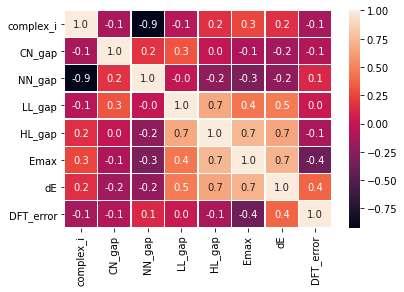

In [32]:
#correlation map
f,ax = plt.subplots()
sns.heatmap(df_test.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax) 
plt.show()

Text(0, 0.5, 'DFT Triplet Energy Error')

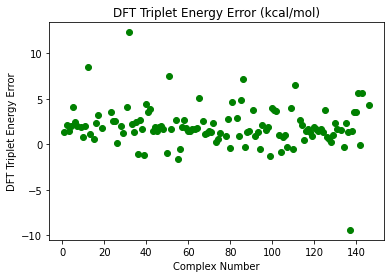

In [18]:
plt.plot(df_sum['complex_i'], df_sum['DFT_error'], 'o', color='g')
plt.title('DFT Triplet Energy Error (kcal/mol)')
plt.xlabel('Complex Number')
plt.ylabel('DFT Triplet Energy Error')

In [21]:
df_sum.loc[df_sum['DFT_error']>6]

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,dE,HOMO,LUMO,HL_gap,DFT_error
10,12,28,1,48.29,C12=CC=CC=C1C=CC3=CC=CN=C23,-145.83,-41.47,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,104.36,119.25,105.44,56.804083,-136.13,-62.91,73.22,8.514083
23,32,65,1,48.57,CC(C=C1)=CN=C1C2=CC=CC(F)=C2,-151.22,-38.49,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,112.73,119.25,110.83,60.872849,-132.88,-62.42,70.46,12.302849
41,51,101,1,46.29,CC(C=C1)=CN=C1C2=CC=C3C(C=CC=C3)=C2,-140.47,-40.94,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,99.53,119.25,100.08,53.752968,-129.51,-61.97,67.53,7.462968
71,86,46,2,37.79,CC(C=C1)=CN=C1C2=CC=CC(OC)=C2,-144.78,-35.22,CC1=CC(C2=NC=CC(C)=C2)=NC=C1,-153.90,-41.21,109.56,112.69,103.57,44.960906,-127.42,-59.96,67.46,7.170906
93,111,101,2,47.17,CC(C=C1)=CN=C1C2=CC=C3C(C=CC=C3)=C2,-140.47,-40.94,CC1=CC(C2=NC=CC(C)=C2)=NC=C1,-153.90,-41.21,99.53,112.69,99.26,53.696128,-128.73,-59.86,68.88,6.526128


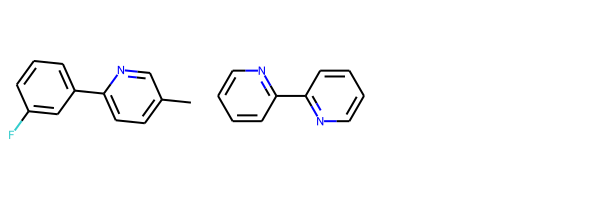

In [23]:
cn_smiles = df_sum['CN_smiles_clean'][23]
nn_smiles = df_sum['NN_smiles_clean'][23]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

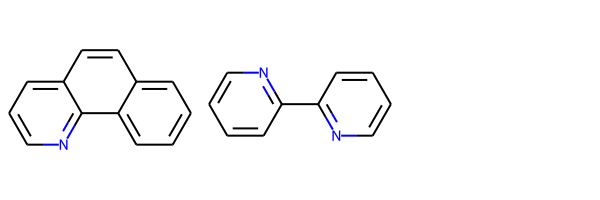

In [24]:
cn_smiles = df_sum['CN_smiles_clean'][10]
nn_smiles = df_sum['NN_smiles_clean'][10]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

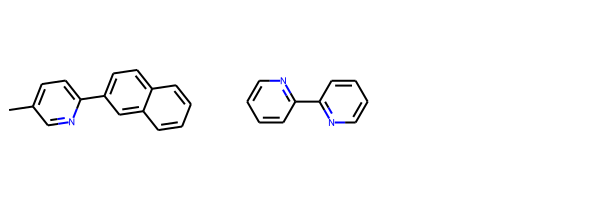

In [25]:
cn_smiles = df_sum['CN_smiles_clean'][41]
nn_smiles = df_sum['NN_smiles_clean'][41]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

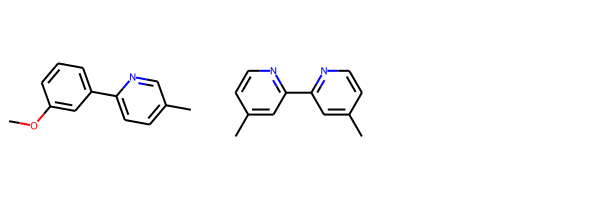

In [26]:
cn_smiles = df_sum['CN_smiles_clean'][71]
nn_smiles = df_sum['NN_smiles_clean'][71]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

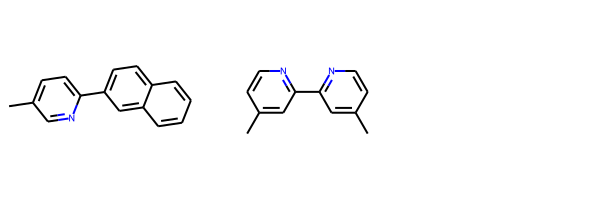

In [27]:
cn_smiles = df_sum['CN_smiles_clean'][93]
nn_smiles = df_sum['NN_smiles_clean'][93]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

In [20]:
df_sum.loc[df_sum['DFT_error']<-5]

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,dE,HOMO,LUMO,HL_gap,DFT_error
117,137,34,3,54.65,COC1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1,-139.72,-43.5,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76,96.22,108.8,99.96,45.236401,-135.21,-61.63,73.58,-9.413598


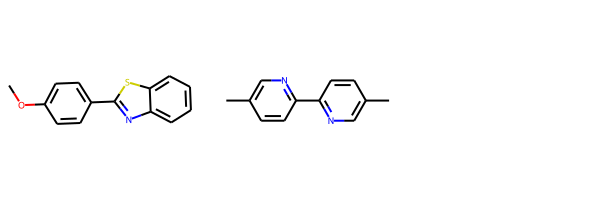

In [22]:
cn_smiles = df_sum['CN_smiles_clean'][117]
nn_smiles = df_sum['NN_smiles_clean'][117]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

Text(0, 0.5, 'DFT Triplet Energy')

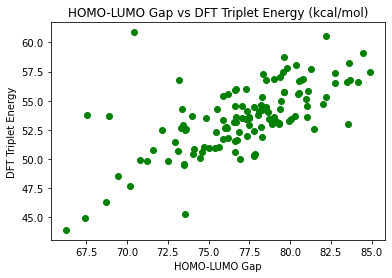

In [118]:
plt.plot(df_sum['HL_gap'], df_sum['dE'], 'o', color='g')
plt.title('HOMO-LUMO Gap vs DFT Triplet Energy (kcal/mol)')
plt.xlabel('HOMO-LUMO Gap')
plt.ylabel('DFT Triplet Energy')

Text(0, 0.5, 'Emission Emax')

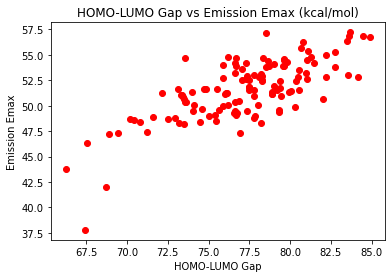

In [122]:
plt.plot(df_sum['HL_gap'], df_sum['Emax'], 'o', color='r')
plt.title('HOMO-LUMO Gap vs Emission Emax (kcal/mol)')
plt.xlabel('HOMO-LUMO Gap')
plt.ylabel('Emission Emax')

Text(0, 0.5, 'Emission Emax')

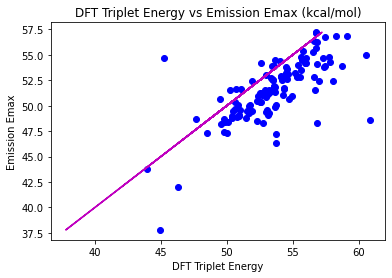

In [120]:
plt.plot(df_sum['dE'], df_sum['Emax'], 'o', color='b')
plt.plot(df_sum['Emax'], df_sum['Emax'], '-', color='m')
plt.title('DFT Triplet Energy vs Emission Emax (kcal/mol)')
plt.xlabel('DFT Triplet Energy')
plt.ylabel('Emission Emax')

Text(0, 0.5, 'LUMO')

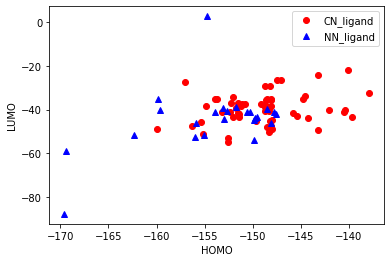

In [21]:
plt.plot(df_cn['CN_HOMO'], df_cn['CN_LUMO'], 'o', color='r', label='CN_ligand');
plt.plot(df_nn['NN_HOMO'], df_nn['NN_LUMO'], '^', color='b', label='NN_ligand');
plt.legend();
plt.xlabel('HOMO');
plt.ylabel('LUMO')

In [10]:
result1 = pd.merge(df, df_cn, how="left", on="C^N")
result = pd.merge(result1, df_nn, how="left", on="N^N")
result

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO
0,0,1,1,48.74,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
1,1,2,1,48.20,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
2,2,3,1,50.86,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
3,3,4,1,51.23,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
4,4,5,1,51.13,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
...,...,...,...,...,...,...,...,...,...,...
1435,1435,105,47,56.65,CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1,-154.83,-38.18,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18
1436,1436,106,47,54.70,FC1=CC=C(C2=CN(C)N=N2)C=C1,-147.04,-26.20,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18
1437,1437,107,47,51.78,CN1N=NC(C2=CC=CC=C2)=C1,-147.52,-26.52,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18
1438,1438,108,47,50.86,COC1=CC=C(N2C=CC=N2)C=C1,-140.15,-21.90,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18


In [11]:
result['CN_gap'] = result['CN_LUMO'] - result['CN_HOMO']
result['NN_gap'] = result['NN_LUMO'] - result['NN_HOMO']
result['LL_gap'] = result['NN_LUMO'] - result['CN_HOMO']
result

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap
0,0,1,1,48.74,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,115.25,119.25,111.88
1,1,2,1,48.20,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,113.19,119.25,108.25
2,2,3,1,50.86,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,112.55,119.25,107.70
3,3,4,1,51.23,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,110.07,119.25,108.32
4,4,5,1,51.13,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,109.30,119.25,107.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,105,47,56.65,CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1,-154.83,-38.18,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,116.65,109.45,113.65
1436,1436,106,47,54.70,FC1=CC=C(C2=CN(C)N=N2)C=C1,-147.04,-26.20,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,120.84,109.45,105.86
1437,1437,107,47,51.78,CN1N=NC(C2=CC=CC=C2)=C1,-147.52,-26.52,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,121.00,109.45,106.34
1438,1438,108,47,50.86,COC1=CC=C(N2C=CC=N2)C=C1,-140.15,-21.90,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,118.25,109.45,98.97


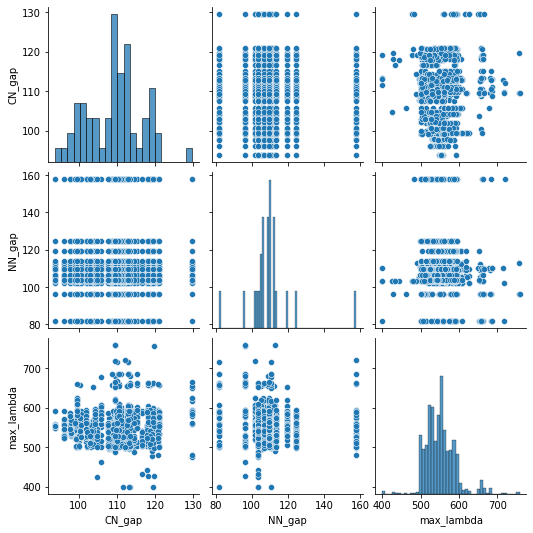

In [69]:
sns.pairplot(sub_df)

<AxesSubplot:xlabel='CN_gap', ylabel='NN_gap'>

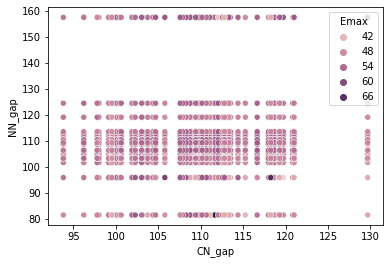

In [12]:
sns.scatterplot(data=result, x="CN_gap", y="NN_gap", hue='Emax')

In [ ]:
plt.plot(df_cn['CN_HOMO'], df_cn['CN_LUMO'], 'o', color='r', label='CN_ligand');
plt.plot(df_nn['NN_HOMO'], df_nn['NN_LUMO'], '^', color='b', label='NN_ligand');
plt.legend();
plt.xlabel('HOMO');
plt.ylabel('LUMO')

Text(0, 0.5, 'NN gap')

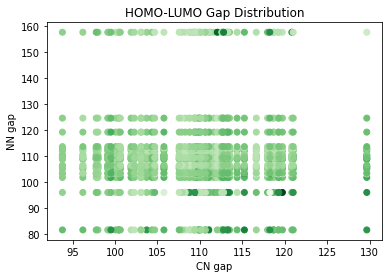

In [71]:
plt.scatter(result['CN_gap'], result['NN_gap'], c=result['max_lambda'], cmap='Greens')
plt.title('HOMO-LUMO Gap Distribution')
plt.xlabel('CN gap')
plt.ylabel('NN gap')

Text(0, 0.5, 'Emax')

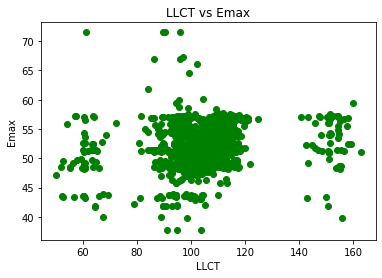

In [86]:
plt.plot(result['LL_gap'], result['Emax'], 'o', color='g')
plt.title('LLCT vs Emax')
plt.xlabel('LLCT')
plt.ylabel('Emax')